In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.metrics import accuracy_score
#from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
import tensorflow as tf
#from Ternsorflow.keras import MNIST
from keras.datasets import mnist
from keras import models
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
from tensorflow.keras.layers import Conv2D, Dense, MaxPool2D, Flatten


In [2]:
#import the data
(train_X, train_y), (test_X, test_y) = mnist.load_data()


In [3]:
# Reshape the data to include a channel dimension (necessary for CNNs)
train_X = train_X.reshape(train_X.shape[0], 28, 28, 1).astype('float32')
test_X = test_X.reshape(test_X.shape[0], 28, 28, 1).astype('float32')


In [4]:
# Normalize the pixel values to the range [0, 1]
train_X /= 255.0
test_X /= 255.0


In [5]:
# Convert labels to one-hot encoding with 10 labels(0-9)
train_y = to_categorical(train_y, 10)
test_y = to_categorical(test_y, 10)


In [6]:
#printing the shapes of the vectors 
print('X_train: ' + str(train_X.shape))
print('Y_train: ' + str(train_y.shape))
print('X_test:  '  + str(test_X.shape))
print('Y_test:  '  + str(test_y.shape))


X_train: (60000, 28, 28, 1)
Y_train: (60000, 10)
X_test:  (10000, 28, 28, 1)
Y_test:  (10000, 10)


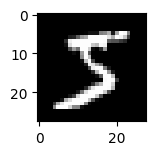

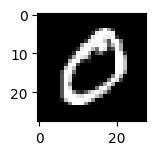

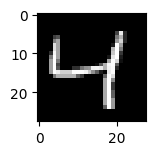

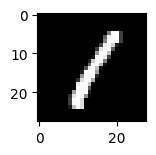

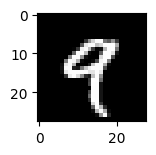

In [7]:
#plot the dataset to have an idea of the dataset we are dealing with
for i in range(5):  #
    plt.subplot(330 + 1 + i)
    plt.imshow(train_X[i], cmap=plt.get_cmap('gray'))
    plt.show()


In [8]:
print(train_X.shape)

(60000, 28, 28, 1)


In [9]:
classifier=models.Sequential()
classifier

<Sequential name=sequential, built=False>

In [10]:
#inpute layer
classifier.add(Conv2D(32, (2,2), 1, activation='relu' ,input_shape=( 28,28,1) ))  #the 2,2 represent the channel. black and white.
classifier.add(MaxPool2D(2,2))

C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
#firts layer
classifier.add(Conv2D(16, (2,2), 1, activation='relu'))
classifier.add(MaxPool2D(2,2))

In [12]:
#classifier.add(Conv2D(8, (2,2), 1, activation='relu'))
#classifier.add(MaxPool2D(2,2))

In [13]:
classifier.add(Flatten())
classifier.add(Dense(128, activation='relu'))
classifier.add(Dense(10, activation='softmax'))# Output layer with 10 units (one for each digit)

In [14]:
classifier.compile(optimizer='adam',metrics=['accuracy'], loss='binary_crossentropy')

In [15]:
classifier.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 27, 27, 32)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 12, 12, 16)     │         2,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 77,370 (302.23 KB)

 Trainable params: 77,370 (302.23 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
# time to train the data
hist = classifier.fit(train_X, train_y, validation_data=(test_X, test_y), batch_size=128,  epochs=5)
hist

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 46s 76ms/step - accuracy: 0.6666 - loss: 0.1970 - val_accuracy: 0.9589 - val_loss: 0.0306
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 36s 77ms/step - accuracy: 0.9573 - loss: 0.0300 - val_accuracy: 0.9719 - val_loss: 0.0204
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 59s 126ms/step - accuracy: 0.9724 - loss: 0.0203 - val_accuracy: 0.9763 - val_loss: 0.0166
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 75s 110ms/step - accuracy: 0.9786 - loss: 0.0151 - val_accuracy: 0.9815 - val_loss: 0.0129
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 42s 89ms/step - accuracy: 0.9834 - loss: 0.0124 - val_accuracy: 0.9835 - val_loss: 0.0118


In [17]:
# Step 2: Make predictions on the test set
y_pred_probs = classifier.predict(test_X)  # Predicted probabilities
y_pred_classes = np.argmax(y_pred_probs, axis=1)  # Convert probabilities to predicted classes
y_true_classes = np.argmax(test_y, axis=1)  # Convert one-hot encoded labels to class labels


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


In [18]:
# Step 3: Calculate accuracy, precision, and recall
accuracy = accuracy_score(y_true_classes, y_pred_classes)
precision = precision_score(y_true_classes, y_pred_classes, average='weighted')
recall = recall_score(y_true_classes, y_pred_classes, average='weighted')


In [19]:
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test Precision: {precision:.4f}")
print(f"Test Recall: {recall:.4f}")


Test Accuracy: 0.9835
Test Precision: 0.9836
Test Recall: 0.9835


In [20]:
# Optional: Print a full classification report
print("\nClassification Report:\n")
print(classification_report(y_true_classes, y_pred_classes))



Classification Report:

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.98      1.00      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.99      0.98      1010
           4       0.98      1.00      0.99       982
           5       0.98      0.98      0.98       892
           6       1.00      0.98      0.99       958
           7       0.99      0.98      0.98      1028
           8       0.97      0.98      0.97       974
           9       0.99      0.96      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [21]:
#testing the model
# Predict class probabilities on the test set
predictions = classifier.predict(test_X)


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


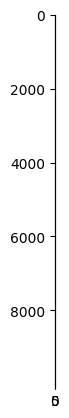

In [22]:
plt.imshow(test_y)

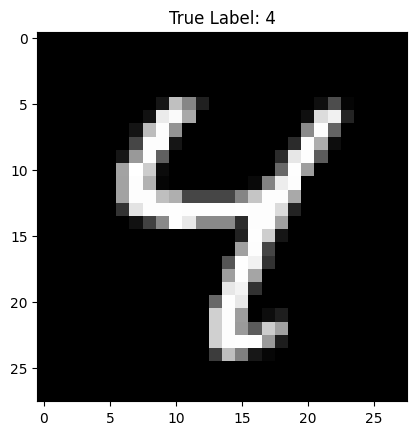

Predicted Label: 4


In [23]:
# Select an example index to test (e.g., index 2)
index = 6
plt.imshow(test_X[index].reshape(28, 28), cmap='grey')  # Display the input image
plt.title(f"True Label: {np.argmax(test_y[index])}")
plt.show()

# Get predicted label
predicted_label = np.argmax(predictions[index])#the argmax() returns the index of maximum value in an array along a specified axis
print(f"Predicted Label: {predicted_label}")